In [7]:
from qiskit import *
from qiskit.tools.jupyter import *
from qiskit.visualization import plot_histogram, plot_gate_map
from qiskit.providers.ibmq import least_busy
#IBMQ.save_account(TOKEN)
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2022-08-12 13:59:28,139: Credentials are already in use. The existing account in the session will be replaced.


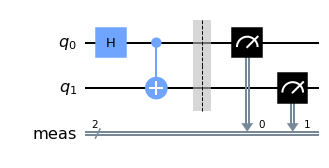

In [2]:
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
qc.measure_all()
qc.draw(output='mpl')

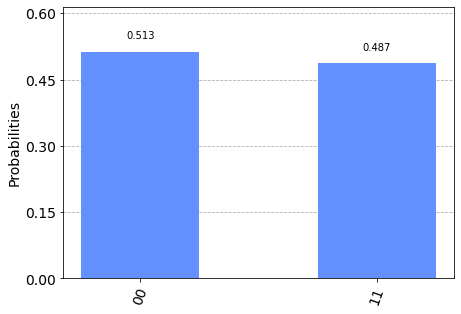

In [3]:
sim = Aer.get_backend('qasm_simulator')
result = execute(qc, backend = sim, shots = 1024).result()
counts = result.get_counts()
plot_histogram(counts)

In [8]:
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 2 and
                                      not x.configuration().simulator and x.status().operational==True))

print("Least busy: ", backend)

%qiskit_job_watcher

job = execute(qc, backend=backend, shots=1024, optimization_level=3)

Least busy:  ibm_oslo


Accordion(children=(VBox(layout=Layout(max_width='710px', min_width='710px')),), layout=Layout(max_height='500…

<IPython.core.display.Javascript object>

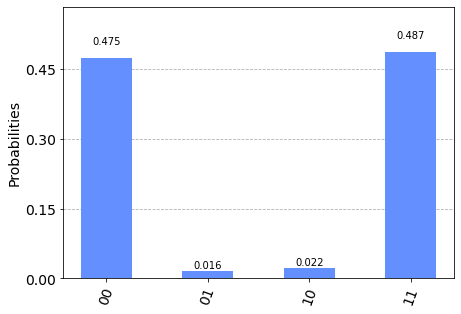

In [9]:
counts = job.result().get_counts()
plot_histogram(counts)